In [99]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import numpy as np
conn = sqlite3.connect("dodgers.sqlite3")

In [100]:

conn = sqlite3.connect("dodgers.sqlite3")

df = pd.read_sql_query("select * from dodgers order by attend ;", conn)

In [101]:
df.head()

,month,day,attend,day_of_week,oppenent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,MAY,14,24312,Monday,Snakes,67,Clear,Night,NO,NO,NO,NO
1,MAY,30,25509,Wednesday,Brewers,69,Clear,Night,NO,NO,NO,NO
2,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
3,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
4,MAY,31,26773,Thursday,Brewers,70,Clear,Night,NO,NO,NO,NO


In [102]:
df.describe()

,month,day,attend,day_of_week,oppenent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
count,81,81,81,81,81,81,81,81,81,81,81,81
unique,7,31,80,7,17,32,2,2,2,2,2,2
top,MAY,30,56000,Friday,Padres,70,Clear,Night,NO,NO,NO,NO
freq,18,5,2,13,9,9,62,66,79,78,67,70


In [103]:
df["attend"] = pd.to_numeric(df["attend"])
df["day"] = pd.to_numeric(df["day"])
df["temp"] = pd.to_numeric(df["temp"])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
month          81 non-null object
day            81 non-null int64
attend         81 non-null int64
day_of_week    81 non-null object
oppenent       81 non-null object
temp           81 non-null int64
skies          81 non-null object
day_night      81 non-null object
cap            81 non-null object
shirt          81 non-null object
fireworks      81 non-null object
bobblehead     81 non-null object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


In [105]:
df.dtypes

month          object
day             int64
attend          int64
day_of_week    object
oppenent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object

In [106]:
df.shape

(81, 12)

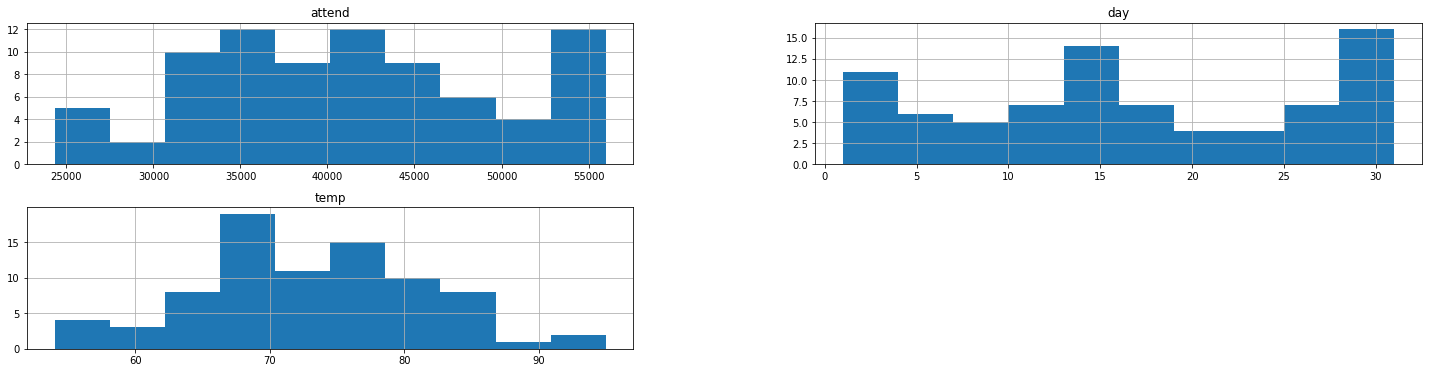

In [107]:


# histograms

df.hist()
plt.show()

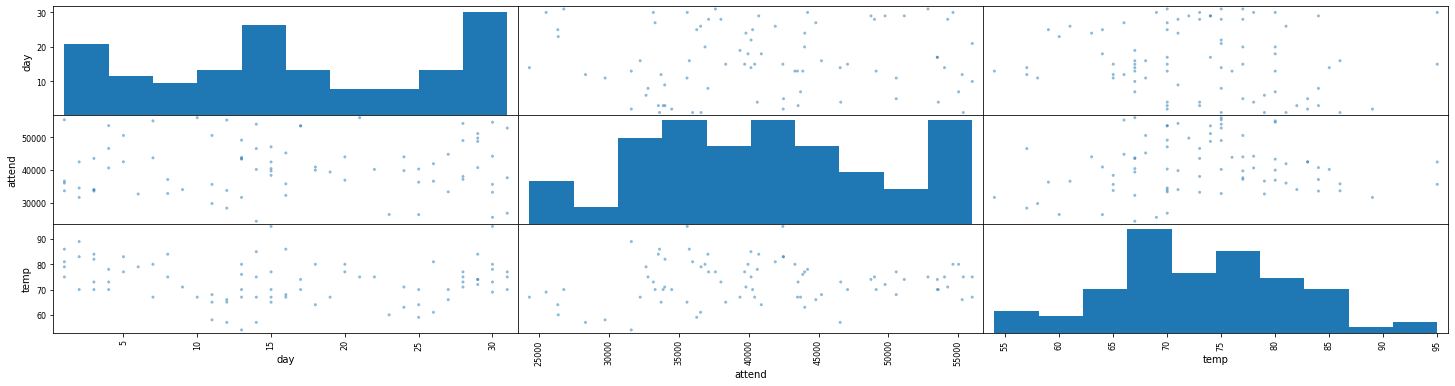

In [108]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

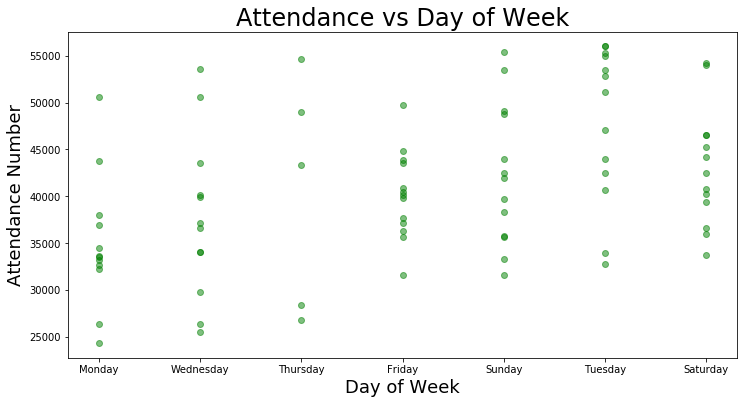

In [109]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

plt.scatter( df.day_of_week, df.attend, color='green', alpha=0.5)

#plt.legend(labels=['Males', 'Felationship betemales'])
plt.title('Attendance vs Day of Week', size=24)
plt.xlabel('Day of Week', size=18)
plt.ylabel('Attendance Number', size=18);
plt.show()

In [110]:


dummy = pd.get_dummies(df, columns=['day_of_week', 'skies','day_night','cap','shirt','month','oppenent','fireworks'], drop_first=True)
dummy.head()

,day,attend,temp,bobblehead,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,...,oppenent_Mets,oppenent_Nationals,oppenent_Padres,oppenent_Phillies,oppenent_Pirates,oppenent_Reds,oppenent_Rockies,oppenent_Snakes,oppenent_White Sox,fireworks_YES
0,14,24312,67,NO,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,30,25509,69,NO,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,25,26345,64,NO,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,23,26376,60,NO,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31,26773,70,NO,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df= pd.concat([df,dummy],axis = 1)
df

,month,day,attend,day_of_week,oppenent,temp,skies,day_night,cap,shirt,...,oppenent_Mets,oppenent_Nationals,oppenent_Padres,oppenent_Phillies,oppenent_Pirates,oppenent_Reds,oppenent_Rockies,oppenent_Snakes,oppenent_White Sox,fireworks_YES
0,MAY,14,24312,Monday,Snakes,67,Clear,Night,NO,NO,...,0,0,0,0,0,0,0,1,0,0
1,MAY,30,25509,Wednesday,Brewers,69,Clear,Night,NO,NO,...,0,0,0,0,0,0,0,0,0,0
2,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,...,0,0,0,0,0,0,0,0,0,0
3,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,...,0,0,0,0,0,0,0,0,0,0
4,MAY,31,26773,Thursday,Brewers,70,Clear,Night,NO,NO,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,AUG,7,55024,Tuesday,Rockies,80,Clear,Night,NO,NO,...,0,0,0,0,0,0,1,0,0,0
77,JUN,12,55279,Tuesday,Angels,66,Cloudy,Night,NO,NO,...,0,0,0,0,0,0,0,0,0,0
78,JUL,1,55359,Sunday,Mets,75,Clear,Night,NO,NO,...,1,0,0,0,0,0,0,0,0,0
79,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,...,0,0,0,0,1,0,0,0,0,0


In [112]:
df_temp = df
df_temp =df_temp.drop(['attend','month','day_of_week','skies','day_night','cap','shirt','bobblehead','fireworks','oppenent'],axis = 1)
df_temp.head()

,day,temp,day,temp,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,...,oppenent_Mets,oppenent_Nationals,oppenent_Padres,oppenent_Phillies,oppenent_Pirates,oppenent_Reds,oppenent_Rockies,oppenent_Snakes,oppenent_White Sox,fireworks_YES
0,14,67,14,67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,30,69,30,69,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,25,64,25,64,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,23,60,23,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31,70,31,70,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


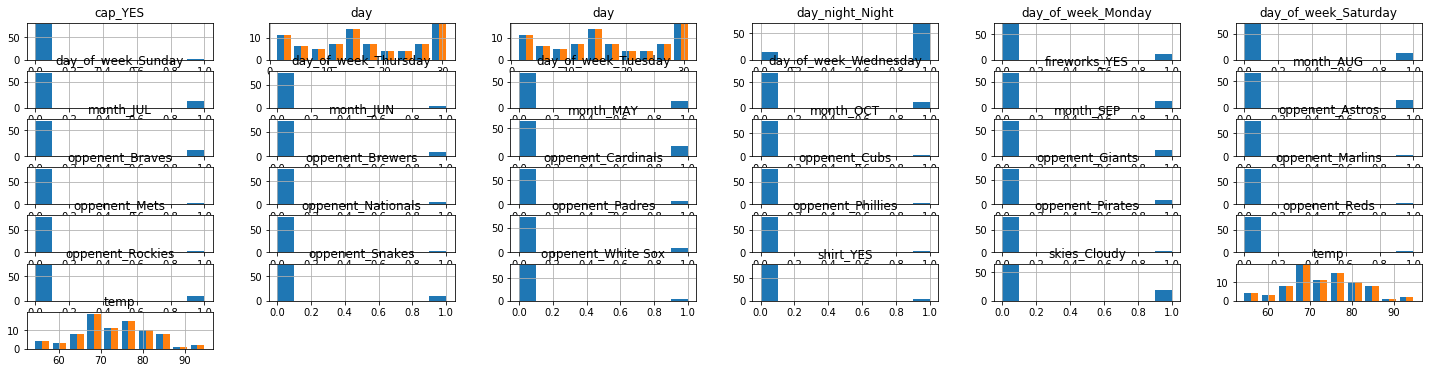

In [113]:
rcParams['figure.figsize'] =25, 6

df_temp.hist()
plt.show()

In [114]:
print(df.corr())

                            day    attend      temp       day    attend  \
day                    1.000000  0.027093 -0.127612  1.000000  0.027093   
attend                 0.027093  1.000000  0.098951  0.027093  1.000000   
temp                  -0.127612  0.098951  1.000000 -0.127612  0.098951   
day                    1.000000  0.027093 -0.127612  1.000000  0.027093   
attend                 0.027093  1.000000  0.098951  0.027093  1.000000   
temp                  -0.127612  0.098951  1.000000 -0.127612  0.098951   
day_of_week_Monday    -0.118786 -0.307198 -0.015883 -0.118786 -0.307198   
day_of_week_Saturday   0.081861  0.107788 -0.024113  0.081861  0.107788   
day_of_week_Sunday     0.021966  0.065153  0.264787  0.021966  0.065153   
day_of_week_Thursday   0.179059 -0.019679 -0.023216  0.179059 -0.019679   
day_of_week_Tuesday   -0.094301  0.355316 -0.020044 -0.094301  0.355316   
day_of_week_Wednesday -0.162472 -0.174723 -0.007474 -0.162472 -0.174723   
skies_Cloudy          -0.

In [115]:
X= df_temp.values

In [116]:
y= df['attend'].values

In [117]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
  
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .20, random_state = 40)
regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding        regr.fit(X_train, Y_train) regr.fit(X_train, Y_train) regr.fit(X_train, Y_train)
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

In [118]:
print(predicted)

[[69471.79035773 69471.79035773]
 [39275.62987171 39275.62987171]
 [48802.99639185 48802.99639185]
 [38409.05415722 38409.05415722]
 [26348.67498357 26348.67498357]
 [37940.26849301 37940.26849301]
 [36093.52365126 36093.52365126]
 [55255.97767952 55255.97767952]
 [38669.29336091 38669.29336091]
 [38366.84042084 38366.84042084]
 [38838.30868063 38838.30868063]
 [55119.37811283 55119.37811283]
 [45775.37277815 45775.37277815]
 [46597.7700434  46597.7700434 ]
 [34209.19422918 34209.19422918]
 [36329.01079115 36329.01079115]
 [51398.25480001 51398.25480001]]


In [119]:
regr.coef_


array([[ 1.02728854e+02, -7.27841138e+01,  1.02728854e+02,
        -7.27841138e+01, -3.79452191e+03, -3.24854222e+02,
        -3.54487269e+03,  9.08796006e+02,  1.20382903e+04,
        -2.06383259e+03, -1.68585765e+03, -2.55439382e+03,
        -2.34649633e-10, -4.59212838e+03,  1.55864494e+04,
         8.47165653e+03, -8.33881623e+03,  1.03530441e+04,
         1.36423416e+04,  1.10497015e+04, -2.89926950e+04,
        -2.46794351e+04, -3.60292644e+04, -2.24613856e+04,
        -1.84588054e+04, -2.73614900e+04, -2.87751352e+04,
         4.51293522e+02, -1.54369944e+03, -1.34004768e+04,
        -2.05376283e+04, -1.94582884e+04, -4.71977984e+02,
        -2.47933207e+04, -2.61657466e+04,  4.60569276e+03,
        -3.69098285e+03],
       [ 1.02728854e+02, -7.27841138e+01,  1.02728854e+02,
        -7.27841138e+01, -3.79452191e+03, -3.24854222e+02,
        -3.54487269e+03,  9.08796006e+02,  1.20382903e+04,
        -2.06383259e+03, -1.68585765e+03, -2.55439382e+03,
        -2.34649633e-10, -4.59